# Практика

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
#from scipy.stats import maxwell
import math
from statsmodels.stats.weightstats import _zconfint_generic

%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [404]:
# возьмём непрерывную случайную величину Максвелла
# Распределение Максвелла дает распределение скоростей молекул в тепловом равновесии, заданное статистической механикой

maxwell_rv = sts.maxwell()
sample = maxwell_rv.rvs(100)
sample

array([1.45498618, 1.25163013, 0.79326775, 2.00745856, 1.6209152 ,
       0.86402601, 1.33830616, 1.62063293, 2.27948142, 0.80438065,
       1.99794552, 1.06303009, 1.68624155, 1.64924811, 4.29673157,
       2.67715111, 1.83588158, 2.16756187, 2.47291543, 0.86099023,
       1.19423853, 1.09336109, 3.15365466, 1.01160974, 1.47396152,
       1.54191749, 2.2601113 , 2.02452857, 1.99198467, 1.41585521,
       1.20982009, 1.065944  , 2.08445807, 1.3468097 , 1.77314487,
       1.36289163, 1.97383304, 1.30926249, 2.92932416, 1.21956066,
       1.91377042, 0.88463616, 1.72432534, 0.85864256, 0.89713826,
       1.47697488, 0.57672155, 1.45782991, 0.99006467, 1.19789365,
       2.13477503, 2.08891435, 1.0921549 , 1.86538339, 2.6919458 ,
       2.74958855, 2.19633012, 1.18662547, 2.1899081 , 1.76042097,
       0.75076315, 2.1148919 , 2.04784118, 1.49277084, 2.08058663,
       1.47959439, 1.31637658, 1.11914466, 1.48102581, 1.78754906,
       1.51224338, 0.70201474, 1.91422993, 2.05729493, 2.54650

In [405]:
# настоящее среднее случайной величины
real_mean = maxwell_rv.mean() 
print('Настоящее среднее случайной величины:', real_mean)

# настоящая дисперсия случайной величины
real_var = maxwell_rv.var() 
print('Настоящая дисперсия случайной величины:', real_var)

Настоящее среднее случайной величины: 1.5957691216057308
Настоящая дисперсия случайной величины: 0.45352091052967447


### Постройте гистограмму выборки и теоретическую плотность распределения

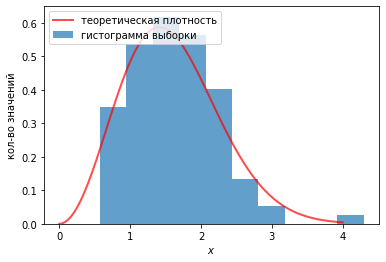

In [406]:
# гистограмма выборки
plt.hist(sample, density=True, label='гистограмма выборки', alpha=0.7)

# теоретическая плотность распределения
x = np.linspace(0,4,100)
pdf = maxwell_rv.pdf(x)
plt.plot(x, pdf, color='r', lw = 2, label='теоретическая плотность', alpha=0.7)
plt.ylabel('кол-во значений')
plt.xlabel('$x$')
plt.legend(loc='upper left');

In [407]:
# выборочное среднее
sample_mean = sample.mean() 
print('Выборочное среднее случайной величины:', sample_mean)

# выборочная дисперсия
sample_var = sample.var() 
print('Выборочная дисперсия случайной величины:',sample_var)

Выборочное среднее случайной величины: 1.6409661399008284
Выборочная дисперсия случайной величины: 0.37018092085975596


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределения используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

мат. ожидание =  1.5957691216057308
дисперсия =  0.45352091052967447


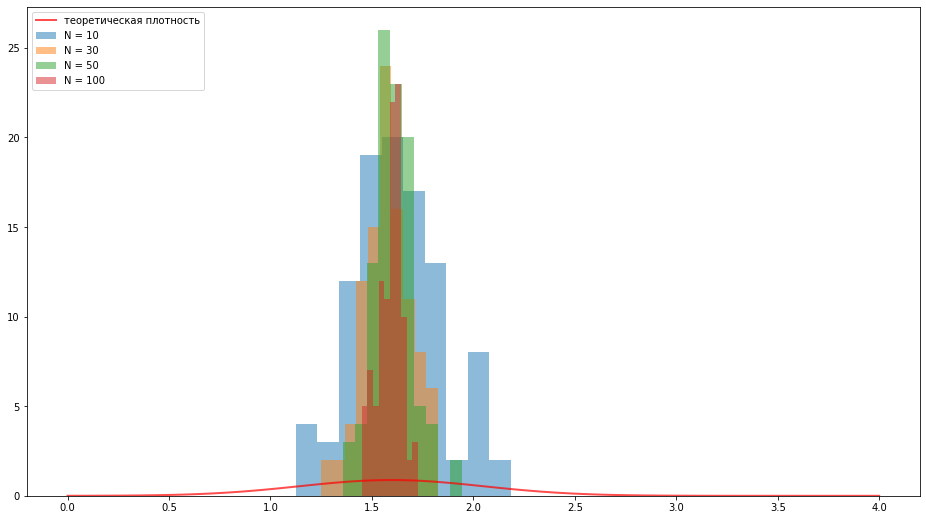

In [408]:
plt.figure(figsize=(16,9))

# настоящие значения мат.ожидания и дисперсии (не приближенные на основе выборки)
mu = real_mean 
sigma = real_var 
print ('мат. ожидание = ' , mu)
print ('дисперсия = ' , sigma)

# зададим нормальное распределенние    
x = np.linspace(0, 4, 100) # N)
norm_rv = sts.norm(mu, sigma) 
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, color='r', lw = 2, alpha=0.7, label='теоретическая плотность')
plt.legend(loc='upper left')

def maxwell(N, mu, sigma):
    N = N
    # сгенерируем много выборочных средних
    means = []
    means.append([np.mean(maxwell_rv.rvs(N)) for i in range(100)])
    plt.hist(means, alpha=0.5, label='N = ' + str(N)) 
    plt.legend(loc='upper left')
    
for N in [10, 30, 50, 100]:
    maxwell(N, mu, sigma)    

Как вы считаете, для выбранного распределения аппроксимация распределения выборочного среднего работает хорошо или плохо?

**Ваш ответ:**

Распределение выборочных средних для Максвелловского распределения хорошо описывается нормальным распределением.
С ростом объёма выборки точность аппроксимации увеличивается.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [409]:
# загружаем из альтернативного хранилища
url = "https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df = pd.read_csv(url)

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [410]:
# количество оставшихся и ушедших
df.groupby('churn')['total day calls'].count()

churn
False    2850
True      483
Name: total day calls, dtype: int64

In [411]:
# средние значения для оставшихся и ушедших
df.groupby('churn')['total day calls'].mean()

churn
False    100.283158
True     101.335404
Name: total day calls, dtype: float64

In [412]:
# ср.квадр.отклонения для оставшихся и ушедших
df.groupby('churn')['total day calls'].std()

churn
False    19.801157
True     21.582307
Name: total day calls, dtype: float64

In [417]:
# напишем функцию для вычисления доверительных интервалов для ушедших и оставшихся клиентов

def churn(churn):
    if churn == 1:
        print("Ушли")
        print("")
        data = df.query('churn == True')['total day calls']
    if churn == 0:
        print("Остались")
        print("")
        data = df.query('churn == False')['total day calls']       
    
    # построим гистограмму распределения данных о звонках в день
    data.hist(alpha=0.7, label='Распределение звонков в день по клиентам', grid=True)
    plt.ylabel('кол-во клиентов')
    plt.xlabel('кол-во звонков в день')
    plt.legend(loc='upper left')
    
    # вычислим мат.ожидание и дисперсию на основе наших данных, зададим нормальное распределенние и определим параметр Z
    mu = np.mean(data)
    sigma = np.var(data)
    norm_rv = sts.norm(mu, sigma)
    alpha = 0.95
    pdf = norm_rv.pdf(data)
    qa = norm_rv.pdf(alpha/2)
    qb = norm_rv.pdf(1-alpha/2)       
    
    # рассчитаем доверительные интервалы разными способами
    print("ДИ для среднего по ЦПТ для сигмы = 1,96: ({}, {}) ".format(
        np.mean(data) - 1.96 * data.std() / np.sqrt(len(data)), np.mean(data) + 1.96 * data.std() / np.sqrt(len(data)))) 

    print("ДИ для среднего по ЦПТ для сигмы = параметр Z: ({}, {}) ".format(
        np.mean(data) - qa * data.std() / np.sqrt(len(data)), np.mean(data) + qb * data.std() / np.sqrt(len(data)))) 

    print("ДИ для среднего по ЦПТ методом _zconfint_generic: {} ".format(
        ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')))        

Ушли

ДИ для среднего по ЦПТ для сигмы = 1,96: (99.41062692289533, 103.26018053052083) 
ДИ для среднего по ЦПТ для сигмы = параметр Z: (101.33458050823168, 101.3362269643938) 
ДИ для среднего по ЦПТ методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


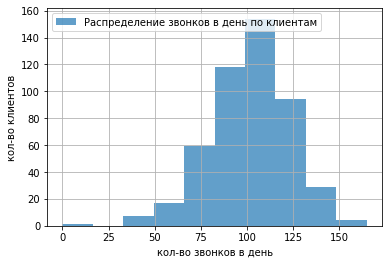

In [418]:
# подставим функцию значение "1" = "Ушли"

churn(1)  

Остались

ДИ для среднего по ЦПТ для сигмы = 1,96: (99.55617497470149, 101.0101408147722) 
ДИ для среднего по ЦПТ для сигмы = параметр Z: (100.28279241051935, 100.2835233908242) 
ДИ для среднего по ЦПТ методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 


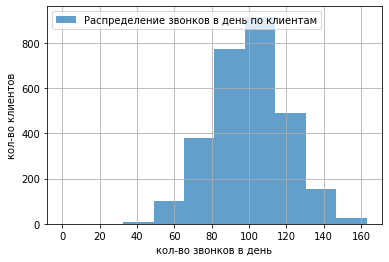

In [419]:
# подставим функцию значение "0" = "Остались"

churn(0) 

**Выводы:**

1. Распределение по среднему количеству звонков в день практически не отличается для ушедших и оставшихся клиентов телеком компании.


2. Доверительный интервал для оставшихся клиентов (churn=0) короче при расчёте разными методами: как через формулу с заданием параметра сигма, так и через функцию _zconfint_generic.


3. Самый узкий доверительный интервал получился при расчёте с помощью Z-параметра, вычисленного на основе заданного нормального распределения для известных параметров мат.ожидания и дисперсии для данных по кол-ву звонков (total day calls).